In [12]:
# Load the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
import keras
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
y_train.shape

(60000,)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
y_test.shape

(10000,)

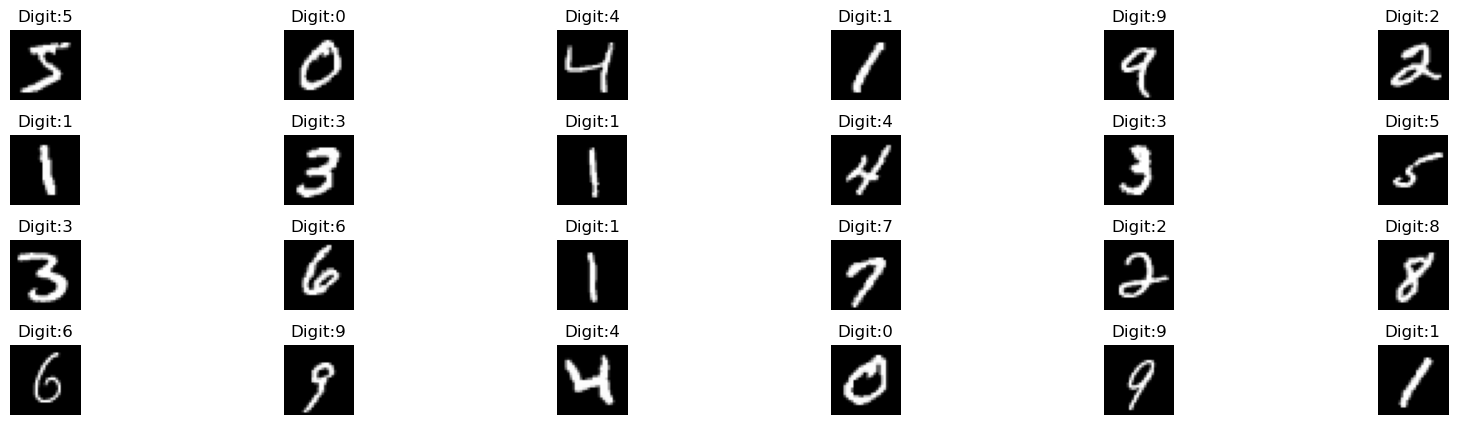

In [69]:
fig=plt.figure(figsize=(20,5))
for i in range(24):
    ax=fig.add_subplot(4,6,i+1,xticks=[],yticks=[])
    plt.title("Digit:{}".format(y_train[i]))
    plt.subplots_adjust(hspace=0.5,wspace=0.5,)
    plt.axis('off')
    ax.imshow(x_train[i],cmap='gray')       

In [19]:
x_train[0].shape

(28, 28)

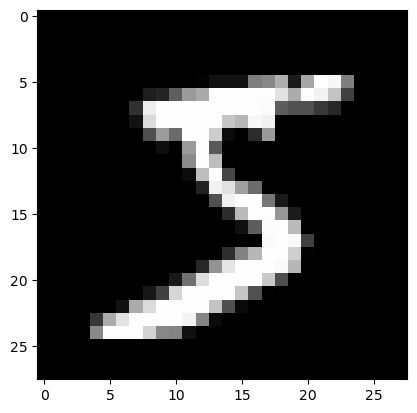

5


In [20]:
plt.imshow(x_train[0],cmap='gray')
plt.show()
print(y_train[0])

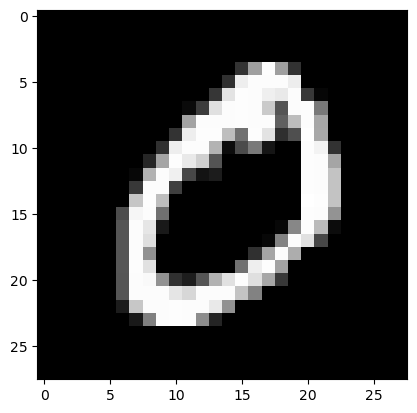

0


In [21]:
plt.imshow(x_train[1],cmap='gray')
plt.show()
print(y_train[1])

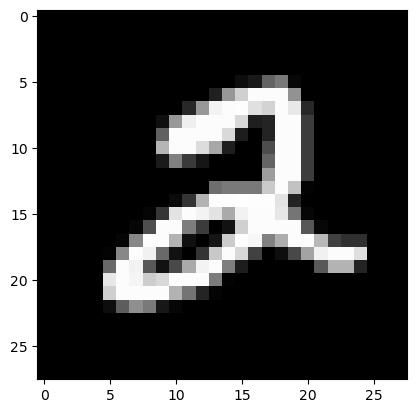

2


In [22]:
plt.imshow(x_train[5],cmap='gray')
plt.show()
print(y_train[5])


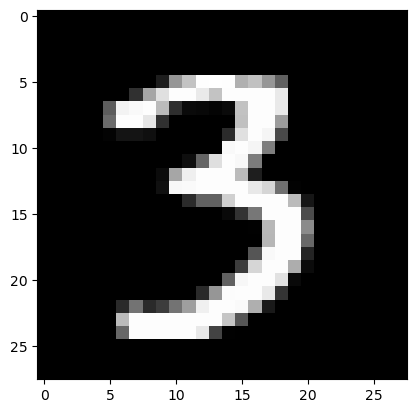

3


In [23]:
plt.imshow(x_train[10000],cmap='gray')
plt.show()
print(y_train[10000])

In [24]:
# Rescale the image by dividing every pixel in Every Image by 255.
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [25]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [26]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [27]:
# Applying One hot encoding to convert categorial to numerical value
from tensorflow import keras
from tensorflow.keras import layers
num_classes=10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [28]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [29]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
#Creating the Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense, Dropout

In [32]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        80        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 64)         

In [34]:
# Compile the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
#Train the model
model.fit(x_train,y_train,verbose=1,epochs=5)

Epoch 1/5


1875/1875 [==============================] - 21s 11ms/step - loss: 0.2246 - accuracy: 0.9279
Epoch 2/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0852 - accuracy: 0.9732
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0675 - accuracy: 0.9789
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0558 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0487 - accuracy: 0.9840


In [36]:
#Train the model
model.fit(x_train,y_train,verbose=1,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0428 - accuracy: 0.9865
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0403 - accuracy: 0.9875
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0382 - accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0335 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0304 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0289 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0269 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0260 - accuracy: 0.9915
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [37]:
# Evaluate the trained Model
loss_accuracy=model.evaluate(x_test,y_test,verbose=0)
print('Test Accuracy:',loss_accuracy[1])
print('Test_loss:',loss_accuracy[0])

Test Accuracy: 0.9915000200271606
Test_loss: 0.02796992100775242


In [38]:
# Evaluate the test accuracy
score=model.evaluate(x_test,y_test,verbose=0)
accuracy=100*score[1]
print('Accuracy:',accuracy)

Accuracy: 99.15000200271606


# Save the Model


In [39]:
model.save('HDR.r10')

INFO:tensorflow:Assets written to: HDR.r10\assets


INFO:tensorflow:Assets written to: HDR.r10\assets


In [40]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [41]:
X_train=x_train.reshape(60000,-1)
X_test=x_test.reshape(10000,-1)

In [42]:
X_train.shape

(60000, 784)

In [43]:
X_test.shape

(10000, 784)

In [46]:
predictions=model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [47]:
print(predictions)

[[0.000000e+00 0.000000e+00 0.000000e+00 ... 1.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 1.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 1.000000e+00
  0.000000e+00]
 ...
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 5.174848e-31
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]]


In [48]:
## To understand, convert the predictions from one hot encoding, we need to use numpy for that
print(np.argmax(predictions[0])) #argmax will return the maximum value index and find the value of it.

7


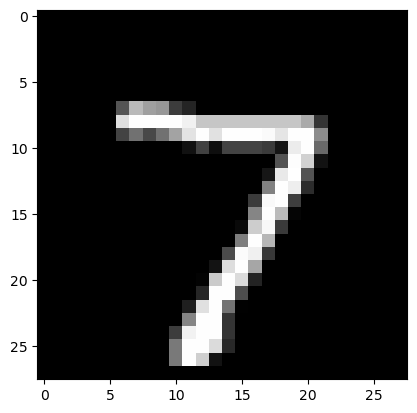

In [54]:
# now to check that our answer is True or False
plt.imshow(x_test[0],cmap='gray')

In [50]:
print(np.argmax(predictions[128]))

8


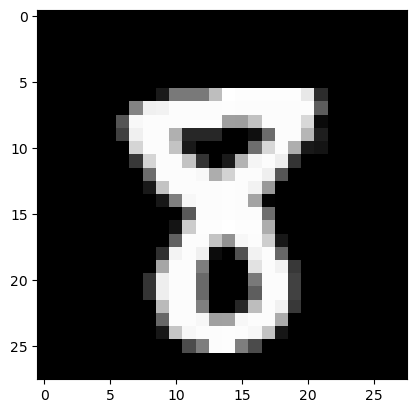

In [53]:
# now to check that our answer is True or False
plt.imshow(x_test[128],cmap='gray')

In [55]:
print(np.argmax(predictions[500]))

3


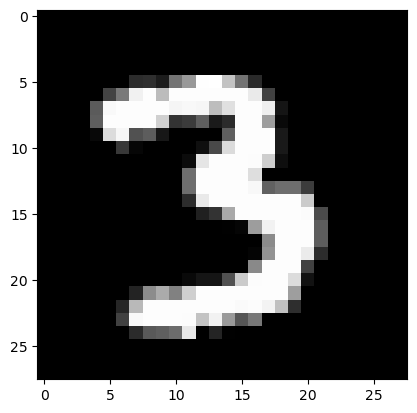

In [56]:
plt.imshow(x_test[500],cmap='gray')

# Compare with SVM

In [34]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
svm_predict=model_svm.predict(X_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=svm_predict))

accuracy score :
 0.9792


# Compare with KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(metric='euclidean')
model_KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [36]:
KNN_predict=model_KNN.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=KNN_predict))

accuracy score :
 0.9688
